In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd 
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn.apionly as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from graphviz import Source
from sklearn.tree import export_graphviz
import os

/home/tungutokyo/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/tungutokyo/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/home/tungutokyo/anaconda3/lib/python3.7/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok = True)

In [3]:
elect_df = pd.read_csv("county_level_election.csv")
elect_df.head()

X = elect_df[['population', 'hispanic', 'minority', 'female', 'unemployed', 'income', 'nodegree', 
              'bachelor', 'inactivity', 'obesity', 'density', 'cancer']]
response = elect_df['votergap']
Xtrain, Xtest, ytrain, ytest = train_test_split(X,response,test_size=0.2)

Text(0.5, 1.0, 'Log-minority and votergap')

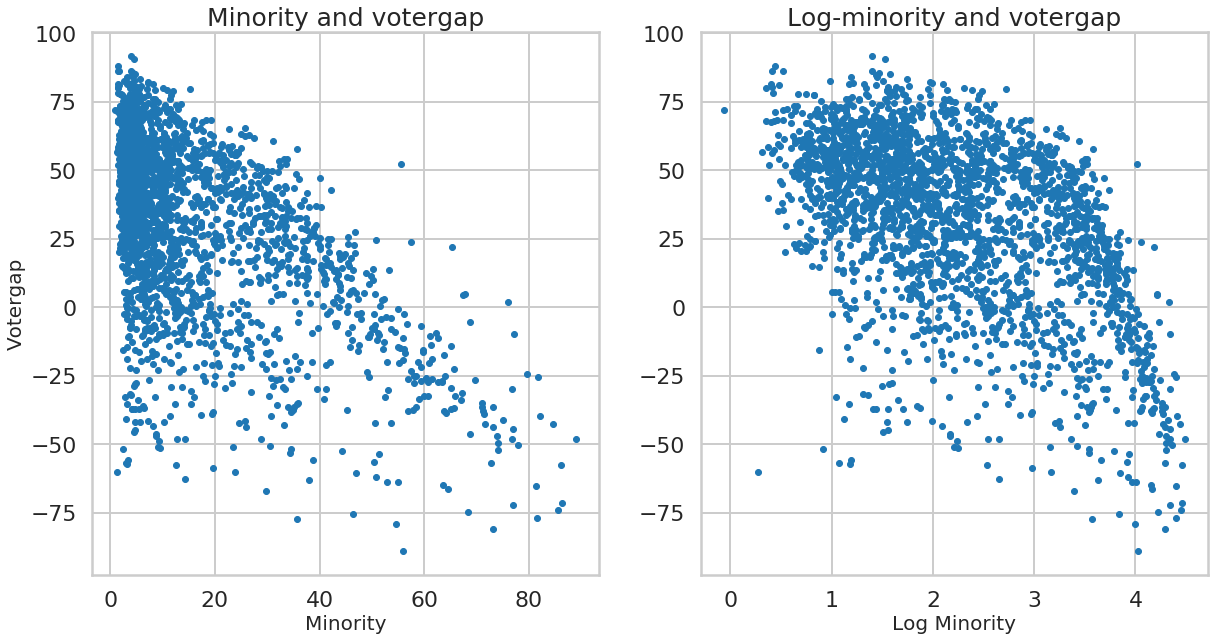

In [10]:
x = Xtrain['minority'].values
o = np.argsort(x)
x = x[o]
y = ytrain.values
y = y[o]
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].plot(x,y,'.')
ax[0].set_title('Minority and votergap',fontsize=25)
ax[0].set_ylabel('Votergap', fontsize=20)
ax[0].set_xlabel('Minority', fontsize=20)
ax[1].plot(np.log(x),y,'.')
ax[1].set_xlabel('Log Minority', fontsize=20)
ax[1].set_title('Log-minority and votergap',fontsize=25)

Text(35.25, 0.5, 'Votergrap')

<Figure size 1440x1440 with 0 Axes>

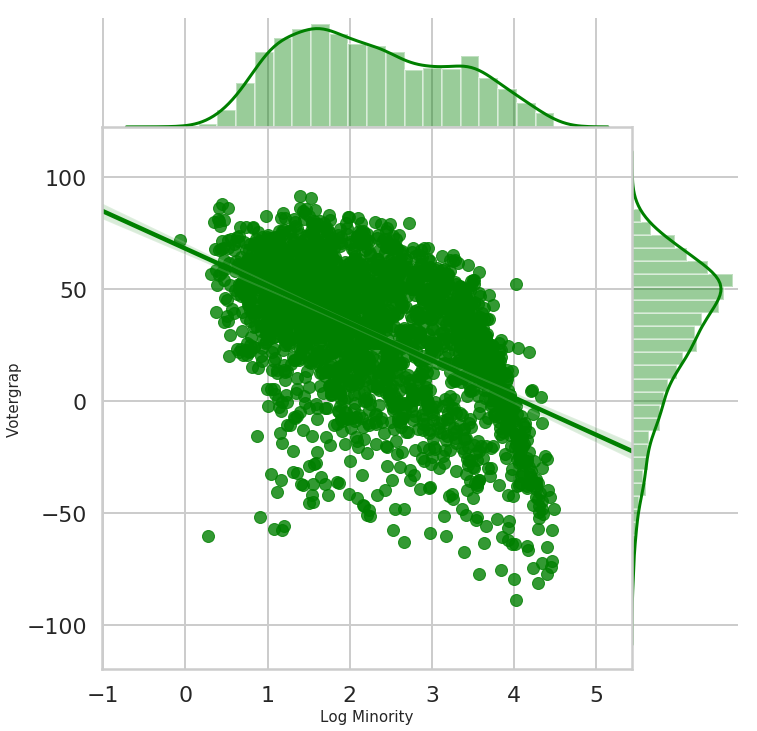

In [18]:
plt.figure(figsize=(20,20))
sns.jointplot(np.log(x),y,kind="reg",space=0, color="g",height=10)
plt.xlabel('Log Minority',fontsize=15)
plt.ylabel('Votergrap',fontsize=15)

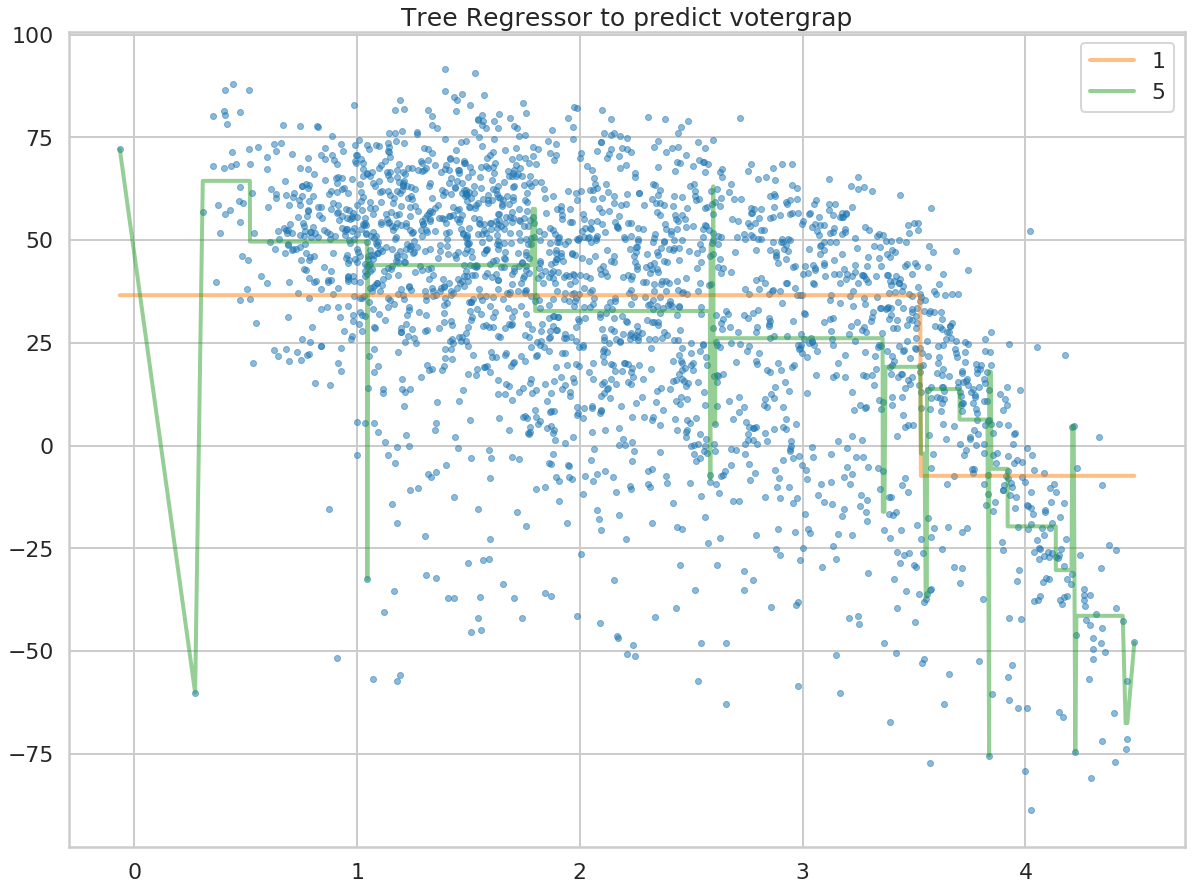

In [24]:
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(np.log(x),y,'.',alpha=0.5)
xx = np.log(x).reshape(-1,1)
for i in [1,5]:
    dtree = DecisionTreeRegressor(max_depth=i)
    dtree.fit(xx,y)
    ax.plot(np.log(x),dtree.predict(xx),label=str(i),alpha=0.5, lw=4)
plt.title('Tree Regressor to predict votergrap',fontsize=25)
plt.legend()

# Set up the parameters for training models

## Case 1.1: The maximum depth of the tree

In [44]:
def plot_regression_predictions(tree_reg, X, y, axes=[-1,5,-80,100],ylabel="$y$"):
    # x1 = np.linspace(axes[0],axes[1],500).reshape(-1,1)
    y_pred = tree_reg.predict(X)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X,y,".", alpha=.2)
    plt.plot(X, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

In [26]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(xx,y)
tree_reg2.fit(xx,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

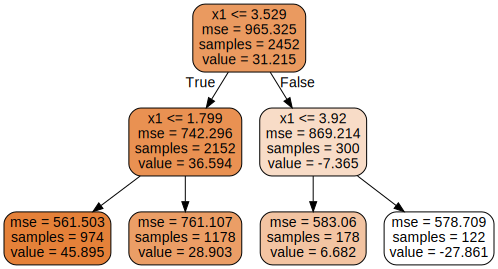

In [27]:
export_graphviz(tree_reg1, out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
                feature_names = ["x1"], rounded=True, filled=True)
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

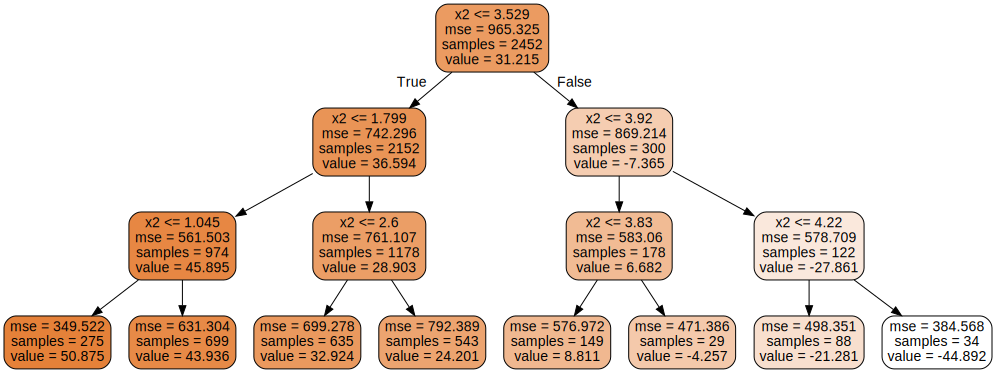

In [28]:
export_graphviz(tree_reg2, out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
                feature_names = ["x2"], rounded=True, filled=True)
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

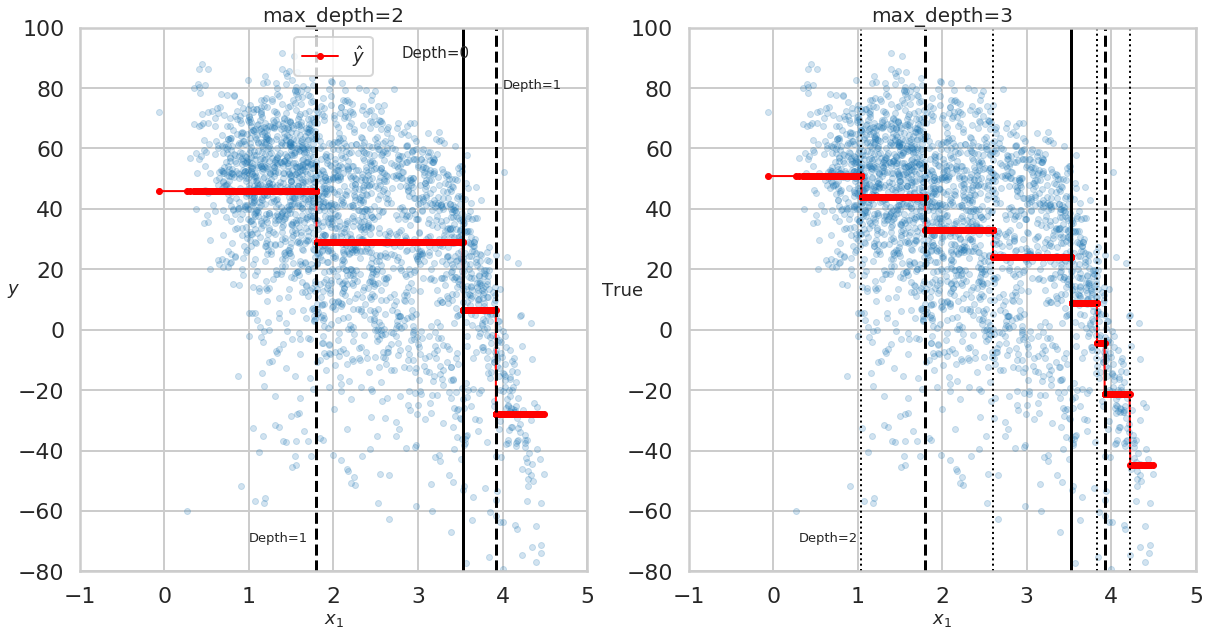

In [45]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plot_regression_predictions(tree_reg1, xx, y)
for split, style in ((3.529, "k-"), (1.799, "k--"), (3.92, "k--")):
    plt.plot([split, split], [-80,100], style, linewidth=3)
plt.text(2.8, 90, "Depth=0", fontsize=15)
plt.text(1, -70, "Depth=1", fontsize=13)
plt.text(4, 80, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=20)

plt.subplot(122)
plot_regression_predictions(tree_reg2, xx, y, ylabel=True)
for split, style in ((3.529, "k-"), (1.799, "k--"), (3.92, "k--")):
    plt.plot([split, split], [-80,100], style, linewidth=3)
for split in (1.045, 2.6, 3.83, 4.22):
    plt.plot([split, split], [-80,100], "k:", linewidth=2)
plt.text(0.3,-70, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=20)
plt.show()

## Case 1.2: The minimum number of samples is required to split an internal node

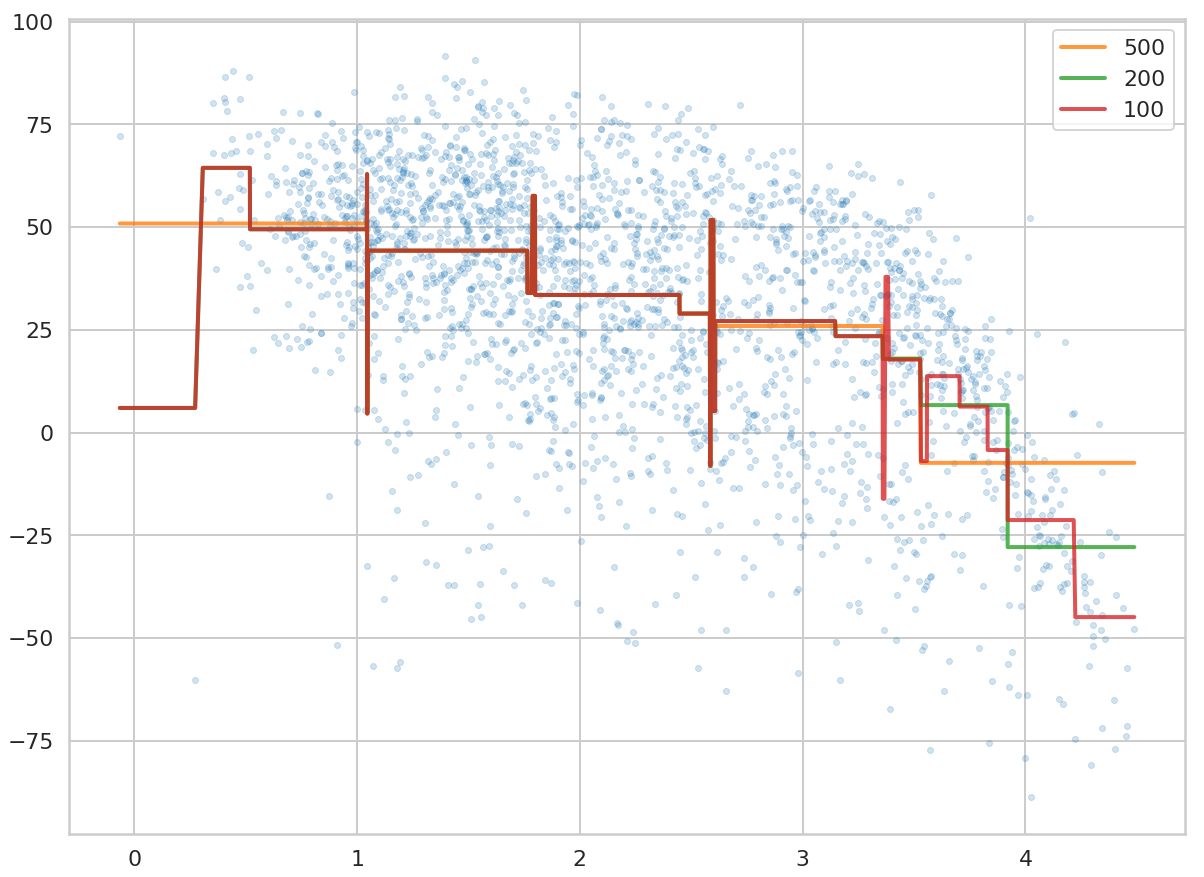

In [54]:
plt.figure(figsize=(20,15))
plt.plot(np.log(x),y,'.',alpha=0.2)
xx = np.log(x).reshape(-1,1)
for i in [500, 200, 100]:
    dtree = DecisionTreeRegressor(max_depth=6, min_samples_split=i)
    dtree.fit(xx,y)
    plt.plot(np.log(x),dtree.predict(xx),label=str(i),alpha=0.8,lw=4)
plt.legend()

## Case 1.3: The minimum number of samples is required to be at leaf node

Text(0.5, 1.0, 'min_sample_left=100')

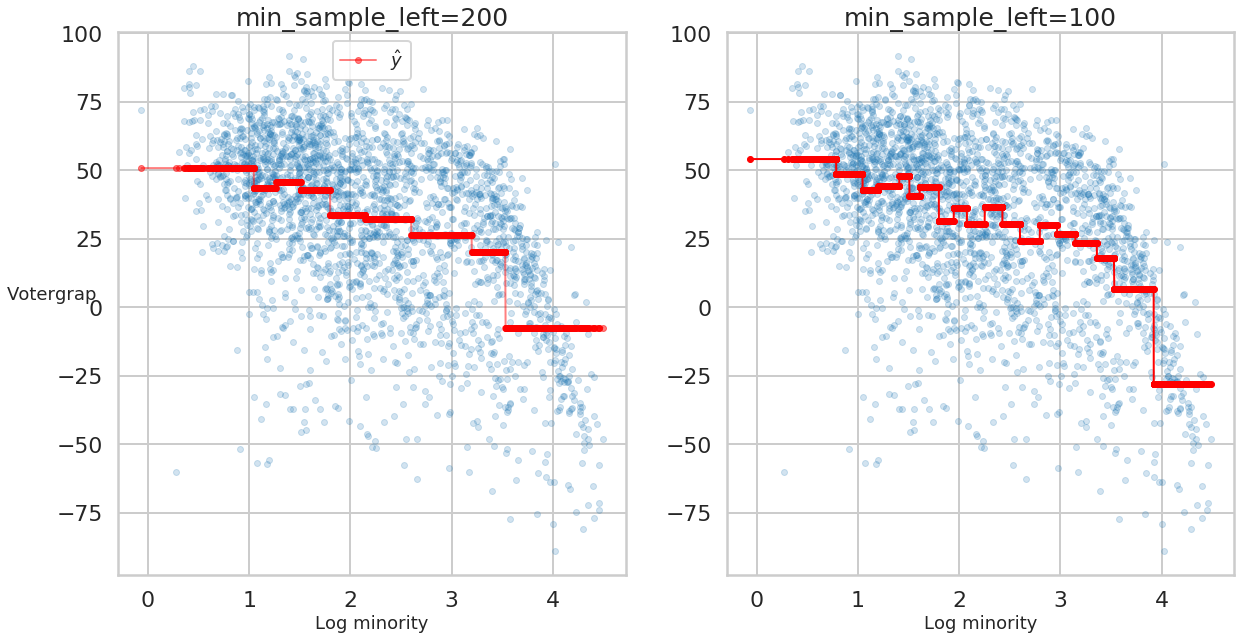

In [56]:
tree_reg1 = DecisionTreeRegressor(random_state=42, min_samples_leaf=200)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=100)
tree_reg1.fit(xx,y)
tree_reg2.fit(xx,y)

y_pred1 = tree_reg1.predict(xx)
y_pred2 = tree_reg2.predict(xx)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(xx,y,".", alpha=0.2)
plt.plot(xx, y_pred1,"r.-", linewidth=2, label=r"$\hat{y}$", alpha=0.5)
#plt.axis([0,1,-0.2,1.1])
plt.xlabel("Log minority", fontsize=18)
plt.ylabel("Votergrap", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("min_sample_left={}".format(tree_reg1.min_samples_leaf), fontsize=25)

plt.subplot(122)
plt.plot(xx,y,".", alpha=0.2)
plt.plot(xx,y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.xlabel("Log minority", fontsize=18)
plt.title("min_sample_left={}".format(tree_reg2.min_samples_leaf), fontsize=25)

In [57]:
xtemp = np.log(Xtrain['minority'].values)
Xtrain = Xtrain.assign(logminority=xtemp)
Xtest = Xtest.assign(logminority=np.log(Xtest['minority'].values))
Xtrain.head()

,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,logminority
733,1746,12.794,3.663,49.317,2.7,52273,11.8,21.8,22.7,23.7,1.0,191.3,1.298282
1112,116383,6.021,16.049,49.995,3.7,49246,5.4,49.4,17.7,24.2,20.2,211.2,2.775647
3023,4342,13.078,4.745,49.457,4.0,45945,11.8,20.3,32.9,32.5,4.3,359.8,1.557091
2542,134208,2.461,45.601,53.125,6.6,42232,16.8,21.5,28.8,34.1,34.9,277.9,3.819930
2444,40666,1.787,2.536,49.800,3.3,52606,8.8,15.9,26.8,27.9,55.3,271.2,0.930588


# Perform cross-validation, randomized search and grid search to find the optimal values for parameters of training models

## Case 2.1: Perform 5-fold cross-validation

([<matplotlib.axis.XTick at 0x7f3ef8c46b00>,
 <a list of 20 Text xticklabel objects>)

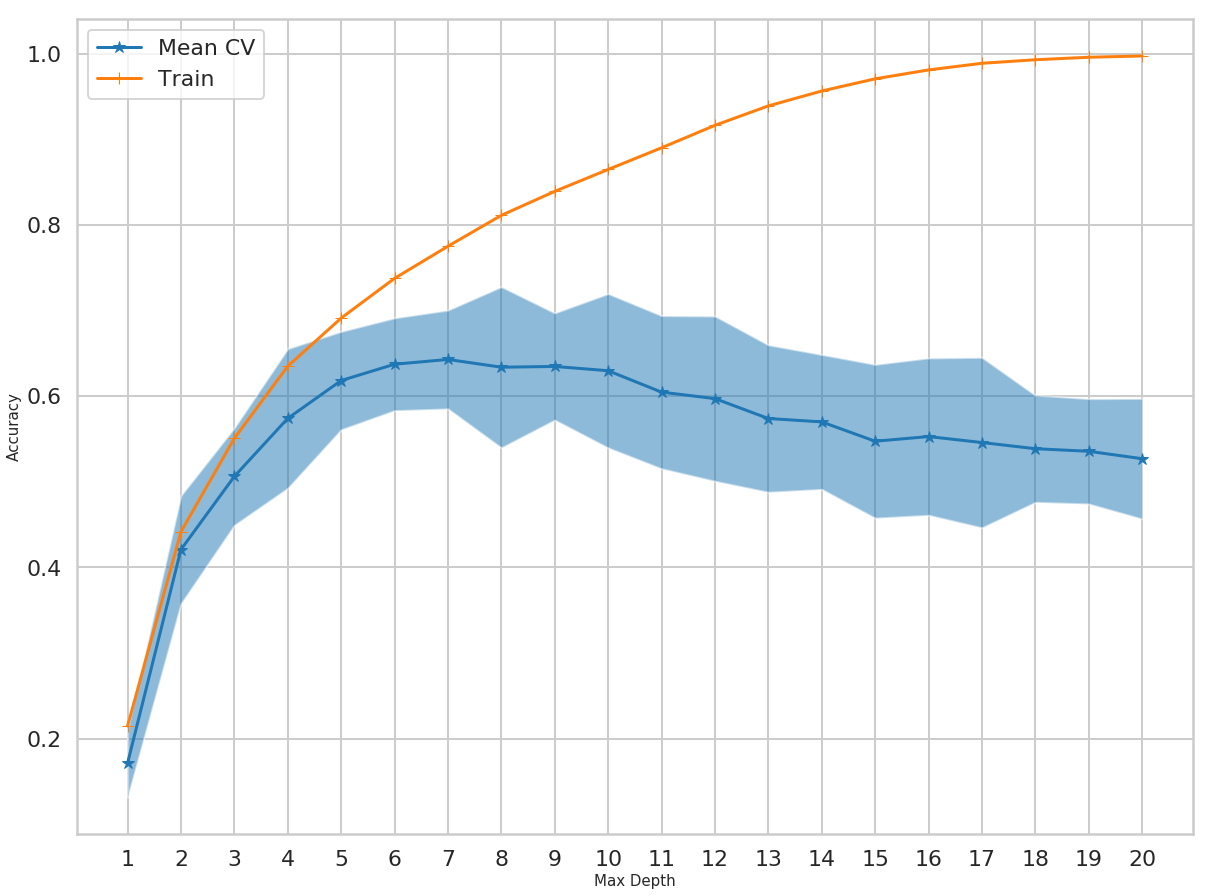

In [59]:
depths = list(range(1,21))
train_scores = []
cvmeans = []
cvstds = []
cv_scores = []
for depth in depths:
    dtree = DecisionTreeRegressor(max_depth=depth)
    train_scores.append(dtree.fit(Xtrain,ytrain).score(Xtrain,ytrain))
    scores = cross_val_score(estimator=dtree, X=Xtrain, y=ytrain, cv=5)
    cvmeans.append(scores.mean())
    cvstds.append(scores.std())    
cvmeans = np.array(cvmeans)
cvstds = np.array(cvstds)
plt.figure(figsize=(20,15))
plt.plot(depths, cvmeans, '*-', label="Mean CV")
plt.fill_between(depths, cvmeans - 2*cvstds, cvmeans + 2*cvstds, alpha=0.5)
ylim = plt.ylim()
plt.plot(depths, train_scores, '-+', label="Train")
plt.legend()
plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("Max Depth", fontsize=15)
plt.xticks(depths)

## Case 2.2: Perform Randomized search on hyper parameters

In [62]:
max_depth = list(range(1,21))
min_samples_leaf = [1,2,4,6,8,10]
min_samples_split = [2,4,6,10]
max_features = ['auto', 'sqrt', 'log2', None]
hyperparameter_grid = {'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                        'max_features': max_features}
dtree = DecisionTreeRegressor(random_state=42)
random_cv = RandomizedSearchCV(estimator=dtree, 
                               param_distributions=hyperparameter_grid, 
                               cv=4, n_iter=25,
                               scoring='neg_mean_absolute_error',
                               n_jobs=-1, verbose=1,
                               return_train_score=True, random_state=42)
random_cv.fit(Xtrain,ytrain)
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score',ascending=False)
random_results.head(10)
random_cv.best_estimator_

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

## Case 2.3: Perform exhausive search over specified parameter values for an estimator

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 556 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 5056 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:   18.0s finished
/home/tungutokyo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/tungutokyo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/tungutokyo/anaconda3/lib/python3.7/site-packages/sklearn/utils/dep

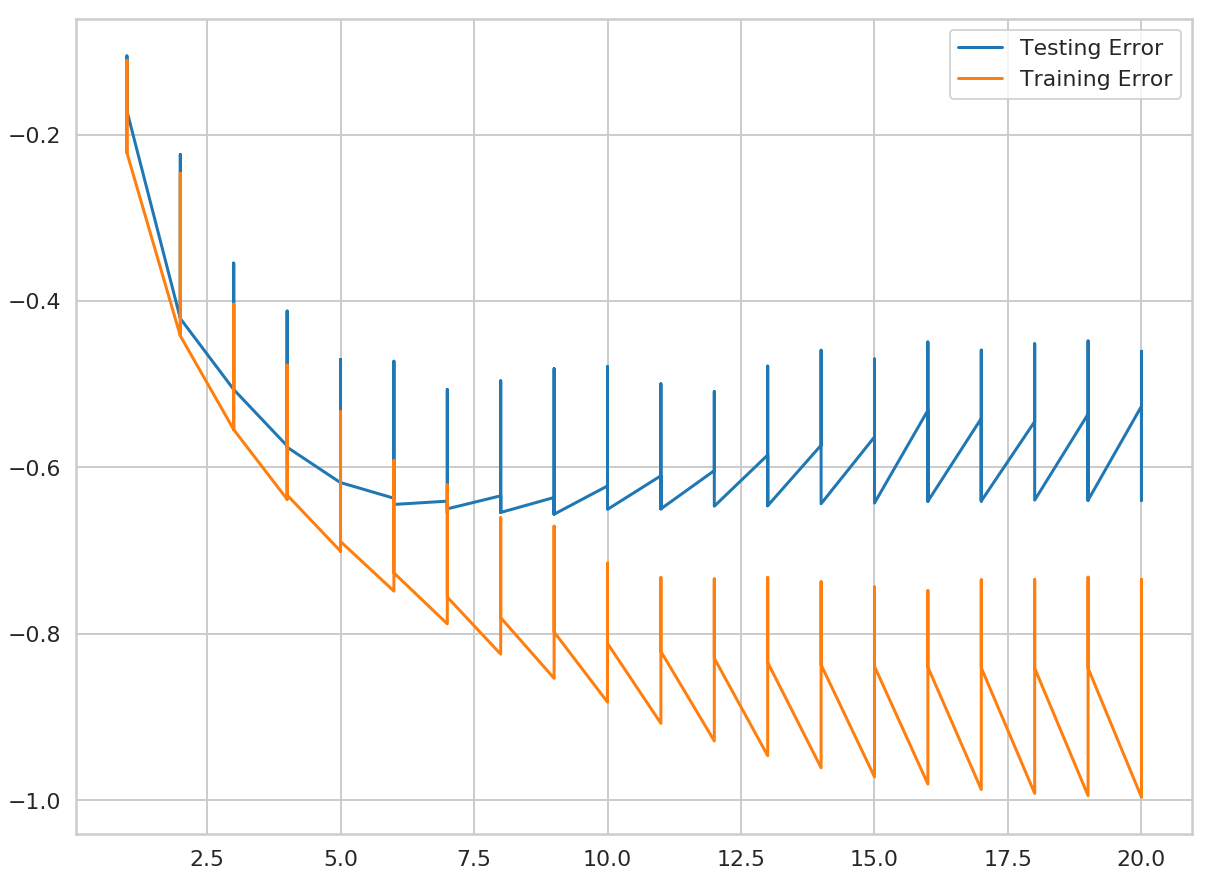

In [64]:
grid_search_cv = GridSearchCV(estimator=dtree,param_grid=hyperparameter_grid, verbose=1, cv=5, n_jobs=-1)
grid_search_cv.fit(Xtrain,ytrain)
results_grid_search = pd.DataFrame(grid_search_cv.cv_results_)
fig, ax = plt.subplots(figsize=(20,15))
plt.plot(results_grid_search['param_max_depth'], 
         -1 * results_grid_search['mean_test_score'], label = 'Testing Error')
plt.plot(results_grid_search['param_max_depth'], 
         -1 * results_grid_search['mean_train_score'], label = 'Training Error')
plt.legend()

In [65]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

## Boostrap-Aggregating

- Generate multiple samples of training data, via boostrapping. A full decision tree is trainned on each sample of data. Each training set will give us a decision tree.
- A large number of tree is created and is averaged over the prediction. Based on the law of large numbers, a large max_depth is selected to shrink this large variance, low bias approach for each individual tree. 

Text(0.5, 1.0, 'Desision tree with boostrap-aggregating')

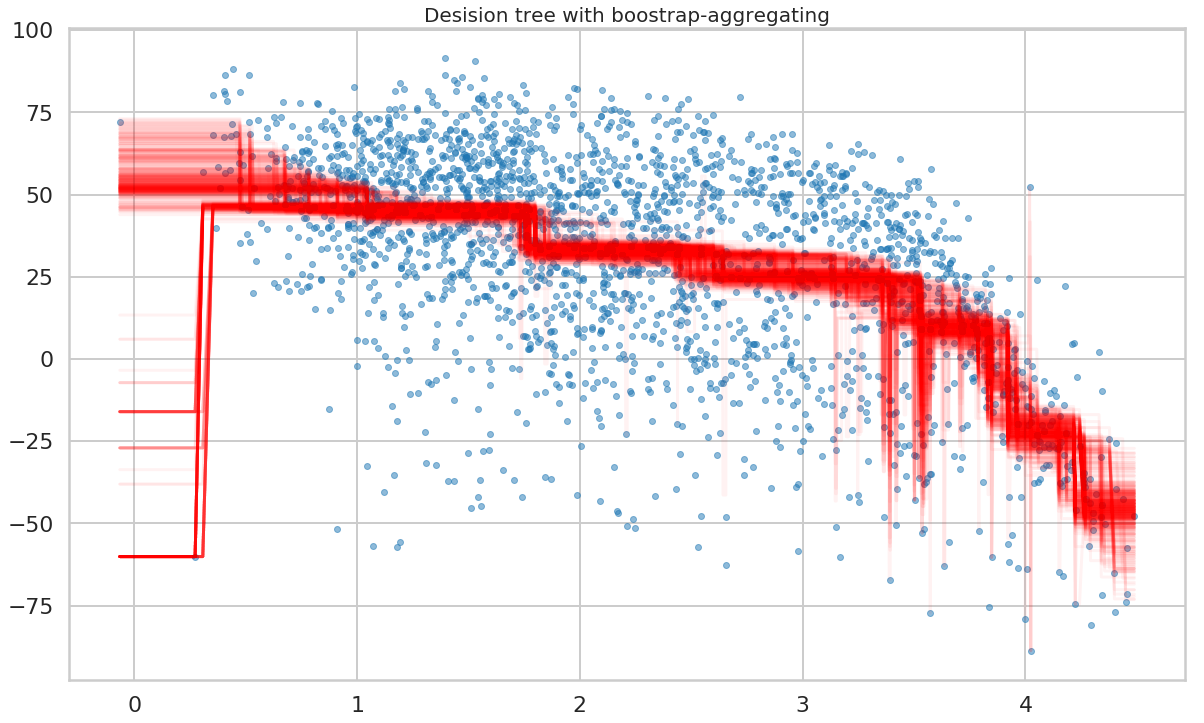

In [69]:
from sklearn.utils import resample
ntrees = 500
estimators = []
R2s = []
yhats_test = np.zeros((Xtest.shape[0], ntrees))

plt.figure(figsize=(20,12))
plt.plot(np.log(x),y,'.',alpha=0.5)
for i in range(ntrees):
    simpletree = DecisionTreeRegressor(max_depth=3)
    boot_xx, boot_yy = resample(Xtrain[['logminority']],ytrain)
    estimators = np.append(estimators, simpletree.fit(boot_xx, boot_yy))
    R2s = np.append(R2s, simpletree.score(Xtest[['logminority']], ytest))
    yhats_test[:,i] = simpletree.predict(Xtest[['logminority']])
    plt.plot(np.log(x), simpletree.predict(np.log(x).reshape(-1,1)), 'red', alpha=0.05)
plt.title('Desision tree with boostrap-aggregating', fontsize=20)

## Reference:
- https://harvard-iacs.github.io/2018-CS109A/labs/lab-9/solutions/
- https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb